In [10]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import time
from numpy import nan
from numpy import inf

In [11]:
S_dataset= pd.read_csv("Static_dataset.csv")

In [12]:
S_dataset.shape

(268074, 16)

In [13]:
S_dataset.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [14]:
S_dataset['Target Attack'].value_counts()

1    147179
0    120895
Name: Target Attack, dtype: int64

C:\Users\Mohamed\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target Attack', ylabel='count'>

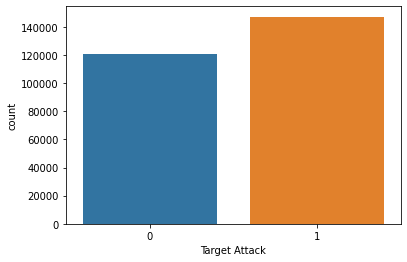

In [15]:
sns.countplot(S_dataset['Target Attack'])

In [16]:
S_dataset.skew()

C:\Users\Mohamed\AppData\Local\Temp/ipykernel_20368/1523257852.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  S_dataset.skew()


FQDN_count         -1.101731
subdomain_length   -0.590480
upper               5.988737
lower               0.343449
numeric            -0.594384
entropy            -0.140156
special            -0.902972
labels             -0.903680
labels_max          3.979910
labels_average      5.087081
len                 2.634801
subdomain          -1.176397
Target Attack      -0.197046
dtype: float64

# Skewed and distribution
# https://www.scribbr.com/statistics/skewness/
# https://stackoverflow.com/questions/50940283/show-metrics-like-kurtosis-skewness-on-distribution-plot-using-seaborn-in-pytho

<AxesSubplot:ylabel='Density'>

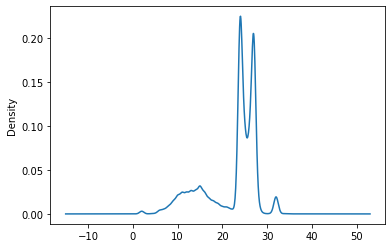

In [17]:
 S_dataset['FQDN_count'].plot.kde()

<AxesSubplot:ylabel='Density'>

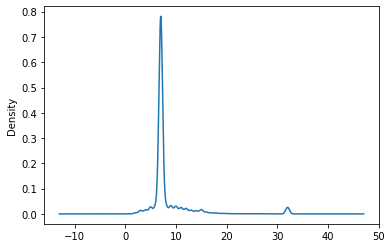

In [18]:
S_dataset['labels_max'].plot.kde()

<AxesSubplot:ylabel='Frequency'>

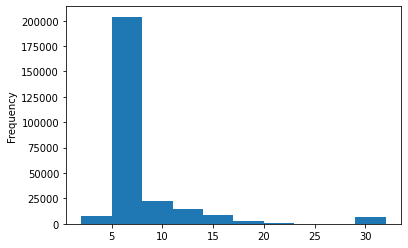

In [19]:
S_dataset['labels_max'].plot(kind='hist')

In [20]:
S_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [21]:
S_dataset.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


In [22]:
S_dataset.head(20)

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
5,16:29.5,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
6,26:58.3,23,3,0,20,0,3.568087,3,3,16,7.000000,pforzheim,pforzheim-bisons,20,1,0
7,57:29.2,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
8,27:59.6,14,3,0,12,0,2.514247,2,3,6,4.000000,face,reface,10,1,0
9,21:27.9,18,0,0,17,0,2.879113,1,2,14,8.500000,store,dellogliostore,15,0,0


In [23]:
S_dataset['longest_word'].value_counts()

2          109981
4           70188
N            4498
C            2969
9            1906
            ...  
yaa             1
queue           1
kit             1
airdrop         1
mal             1
Name: longest_word, Length: 6224, dtype: int64

In [24]:
S_dataset.head(20)

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
5,16:29.5,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
6,26:58.3,23,3,0,20,0,3.568087,3,3,16,7.000000,pforzheim,pforzheim-bisons,20,1,0
7,57:29.2,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
8,27:59.6,14,3,0,12,0,2.514247,2,3,6,4.000000,face,reface,10,1,0
9,21:27.9,18,0,0,17,0,2.879113,1,2,14,8.500000,store,dellogliostore,15,0,0


In [25]:
S_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [26]:
S_dataset['longest_word'].value_counts()

2          109981
4           70188
N            4498
C            2969
9            1906
            ...  
yaa             1
queue           1
kit             1
airdrop         1
mal             1
Name: longest_word, Length: 6224, dtype: int64

In [27]:
S_dataset['sld'].value_counts()

192                                 109517
224                                  70188
FHEPFCELEHFCEPFFFACACACACACACABN      4498
DESKTOP-3JF04TC                       1961
239                                   1906
                                     ...  
freesgift                                1
secureserver                             1
airdropalert                             1
queue-it                                 1
lahemal                                  1
Name: sld, Length: 11112, dtype: int64

In [28]:

S_dataset['longest_word'] = S_dataset['longest_word'].replace(r'(([a-z]+)|([A-Z]+))',2, regex=True)
S_dataset['longest_word'].fillna(2,inplace=True)
S_dataset['longest_word']=S_dataset['longest_word'] .astype('int') 
S_dataset['sld'] = S_dataset['sld'].replace(r'(([a-z]+)|([A-Z]+|(0-1)))',192, regex=True)
S_dataset['sld']=S_dataset['sld'] .astype('int') 

In [29]:
S_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268074 non-null  int32  
 12  sld               268074 non-null  int32  
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int32

In [30]:
S_dataset.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [31]:

X=S_dataset.drop(labels = ["Target Attack", "timestamp"], axis=1) 
y=S_dataset["Target Attack"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42,stratify=y)

In [33]:
clf=LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)
from sklearn.metrics import classification_report,accuracy_score
y_pred=clf.predict(X_test)
acc=accuracy_score(y_pred,y_test)
print(acc)
print(classification_report(y_pred,y_test))

0.8241245020068936
              precision    recall  f1-score   support

           0       0.61      0.99      0.76     18719
           1       1.00      0.76      0.86     48300

    accuracy                           0.82     67019
   macro avg       0.81      0.88      0.81     67019
weighted avg       0.89      0.82      0.83     67019



n_components = 1
n_components = 2
n_components = 3
n_components = 4
n_components = 5
n_components = 6
n_components = 7
n_components = 8
n_components = 9
n_components = 10
n_components = 11
n_components = 12
n_components = 13


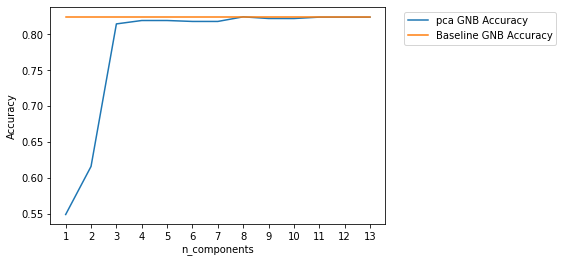

In [34]:
from sklearn.decomposition import PCA
def tune_pca(clf, X_trian, y_train, X_test, y_test, n_min, n_max):
    accs = []
    for i in range(n_min, n_max):
        print(f'n_components = {i}')
        pca = PCA(n_components=i)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        clf.fit(X_train_pca, y_train)
        preds = clf.predict(X_test_pca)
        accuracy = accuracy_score(y_test, preds)
        accs.append(accuracy)
    return accs

def visualize_accs(baseline_acc, tuned_accs, clf_name, min_feats=0, operation='PCA', xlabel='n_components'):
    plt.plot(range(min_feats, min_feats+len(tuned_accs)), tuned_accs, label=f'{operation} {clf_name} Accuracy')
    plt.plot(range(min_feats, min_feats+len(tuned_accs)), [baseline_acc]*len(tuned_accs), label=f'Baseline {clf_name} Accuracy')
    plt.xlabel(xlabel)
    plt.xticks(range(min_feats, min_feats+len(tuned_accs)))
    plt.ylabel("Accuracy")
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
clf = LogisticRegression(max_iter=1000)
clf_pca_accs = tune_pca(clf, X_train, y_train, X_test, y_test, 1, 14)
visualize_accs(acc, clf_pca_accs, "GNB", min_feats=1, operation='pca')

In [35]:
clf=LogisticRegression(max_iter=1000)
#clf.fit(X_train,y_train)

In [36]:
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("pca", PCA(n_components=7)), ("logistic", clf)])
pipe.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=7)),
                ('logistic', LogisticRegression(max_iter=1000))])

In [37]:
y_pred=pipe.predict(X_test)
acc=accuracy_score(y_pred,y_test)
print(acc)
print(classification_report(y_pred,y_test))

0.8196332383353975
              precision    recall  f1-score   support

           0       0.62      0.97      0.76     19388
           1       0.98      0.76      0.86     47631

    accuracy                           0.82     67019
   macro avg       0.80      0.86      0.81     67019
weighted avg       0.88      0.82      0.83     67019



In [38]:
pipe.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=7)),
                ('logistic', LogisticRegression(max_iter=1000))])

In [39]:
import pickle
from sklearn.datasets import load_diabetes

In [23]:
pickle.dump(pipe, open('Staitic_model.pkl', 'wb'))

# Feature Filtering
##  correlation
## Mutual info
## pca
## Kendall
